In [1]:
import pandas as pd

In [2]:
viirs_cleaned_df = pd.read_csv('viirs_cleaned_dataset.csv')

In [3]:
viirs_cleaned_df.head()

,longitude,latitude,light_intensity,state,year,month
0,-41.908333,-20.8375,0.18,rio,2020,1
1,-41.904167,-20.8375,0.23,rio,2020,1
2,-41.900000,-20.8375,0.20,rio,2020,1
3,-41.895833,-20.8375,0.21,rio,2020,1
4,-41.891667,-20.8375,0.24,rio,2020,1


In [4]:
viirs_cleaned_df.tail()

,longitude,latitude,light_intensity,state,year,month
12294358,-39.662500,-18.3125,0.45,bahia,2020,3
12294359,-39.658333,-18.3125,0.70,bahia,2020,3
12294360,-39.654167,-18.3125,0.51,bahia,2020,3
12294361,-39.650000,-18.3125,0.37,bahia,2020,3
12294362,-39.645833,-18.3125,0.29,bahia,2020,3


In [5]:
viirs_cleaned_df.shape

(12294363, 6)

In [6]:
viirs_cleaned_df.size

73766178

In [7]:
len(viirs_cleaned_df)

12294363

In [8]:
viirs_cleaned_df.columns

Index(['longitude', 'latitude', 'light_intensity', 'state', 'year', 'month'], dtype='object')

In [9]:
viirs_cleaned_df.dtypes

longitude          float64
latitude           float64
light_intensity    float64
state               object
year                 int64
month                int64
dtype: object

In [10]:
viirs_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294363 entries, 0 to 12294362
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   longitude        float64
 1   latitude         float64
 2   light_intensity  float64
 3   state            object 
 4   year             int64  
 5   month            int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 562.8+ MB


In [11]:
viirs_cleaned_df.describe()

,longitude,latitude,light_intensity,year,month
count,1.229436e+07,1.229436e+07,1.229436e+07,12294363.0,1.229436e+07
mean,-4.385499e+01,-1.601142e+01,9.836670e-01,2020.0,2.025935e+00
std,3.845472e+00,5.019361e+00,7.023163e+00,0.0,8.121967e-01
min,-5.313333e+01,-2.533750e+01,1.000000e-02,2020.0,1.000000e+00
25%,-4.717917e+01,-2.167500e+01,2.400000e-01,2020.0,1.000000e+00
50%,-4.312917e+01,-1.405417e+01,3.400000e-01,2020.0,2.000000e+00
75%,-4.053333e+01,-1.173333e+01,4.500000e-01,2020.0,3.000000e+00
max,-3.735417e+01,-8.570833e+00,7.904140e+03,2020.0,3.000000e+00


<Axes: ylabel='Frequency'>

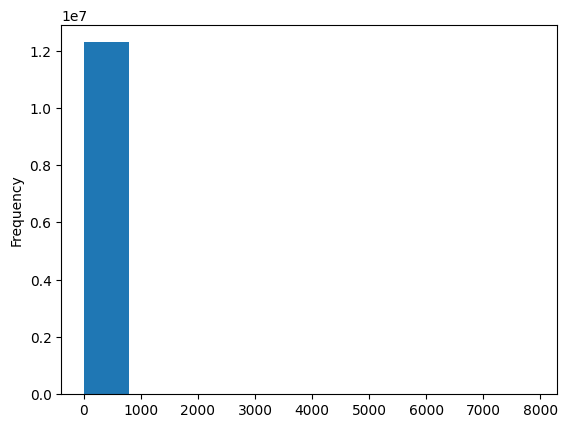

In [12]:
light = viirs_cleaned_df['light_intensity']
light.plot.hist()

<Axes: ylabel='Frequency'>

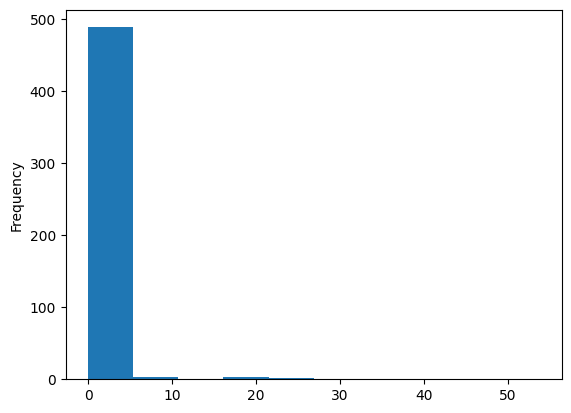

In [13]:
sample = light.sample(500)
sample.plot.hist()

In [14]:
viirs_cleaned_df.isnull().sum()

longitude          0
latitude           0
light_intensity    0
state              0
year               0
month              0
dtype: int64

In [15]:
viirs_cleaned_df.isna().sum()

longitude          0
latitude           0
light_intensity    0
state              0
year               0
month              0
dtype: int64

In [16]:
viirs_cleaned_df.duplicated().sum()

0

In [17]:
# do not run this cell after removing duplications 

# duplicated_rows = viirs_cleaned_df[viirs_cleaned_df.duplicated(keep=False)]

# sample_of_duplicates = duplicated_rows.sample(n=10, random_state=42)
# print(sample_of_duplicates)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'light_intensity'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

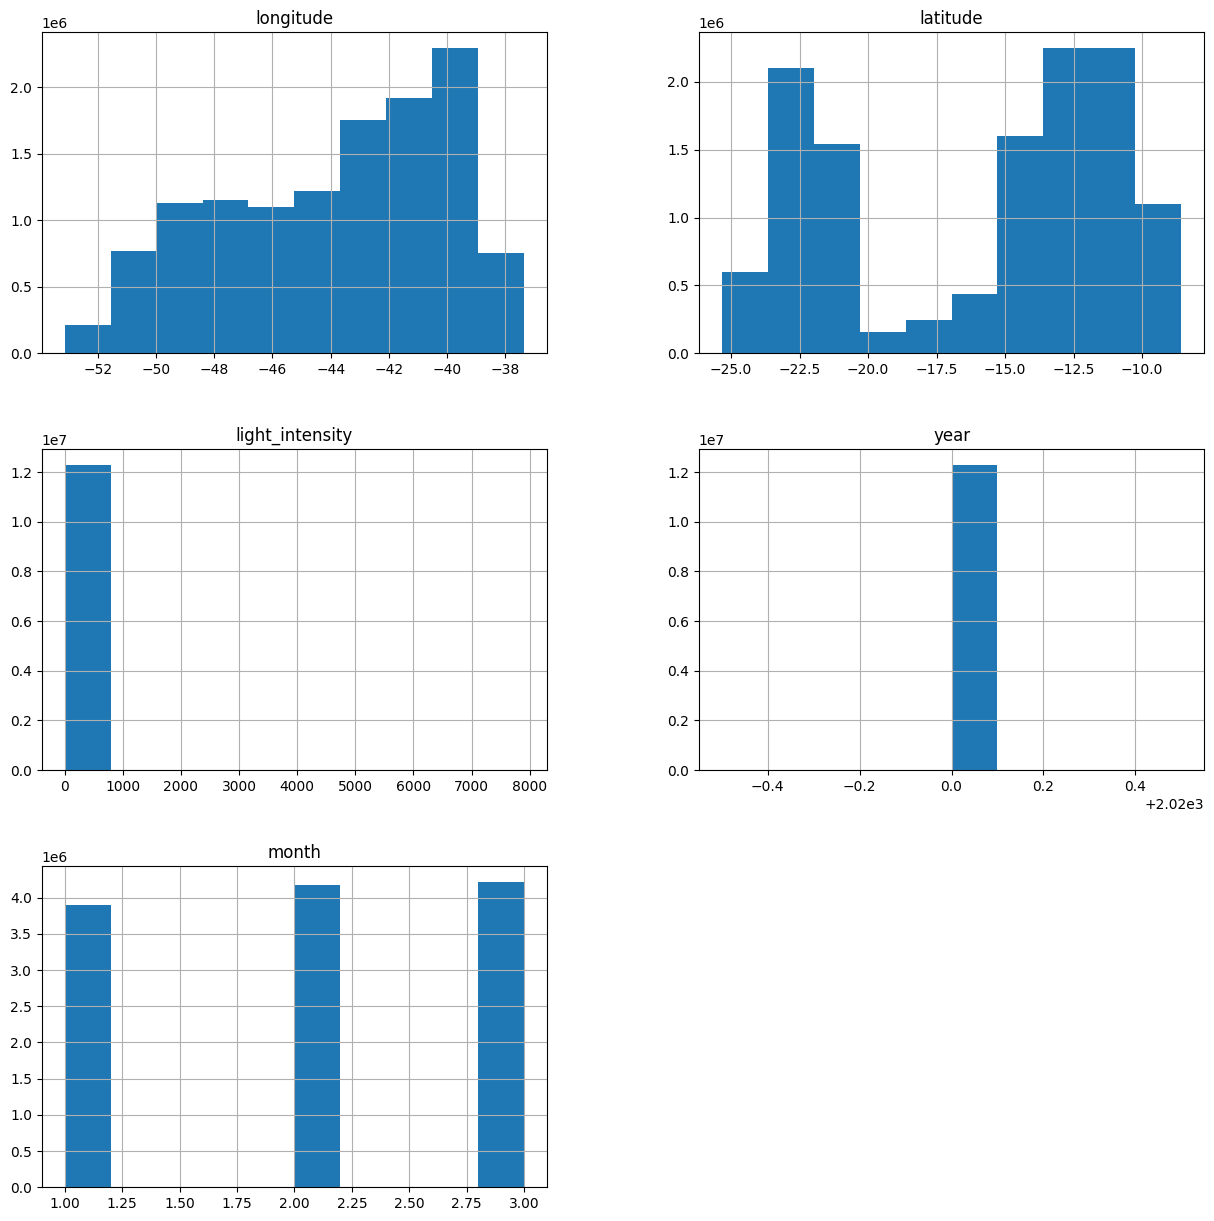

In [18]:
viirs_cleaned_df.hist(figsize=(15,15))

In [19]:
zero_count = (viirs_cleaned_df['light_intensity'] == 0).sum()

print(f"Number of zeroes in the column 'light_intensity': {zero_count}")

Number of zeroes in the column 'light_intensity': 0


In [20]:
neg_count = (viirs_cleaned_df['light_intensity'] < 0).sum()

print(f"Number of negative values in the column 'light_intensity': {neg_count}")

Number of negative values in the column 'light_intensity': 0


In [21]:
pos_count = (viirs_cleaned_df['light_intensity'] > 0).sum()

print(f"Number of positive values in the column 'light_intensity': {pos_count}")

Number of positive values in the column 'light_intensity': 12294363


In [22]:
# # # approach 1
# # total_radiance = viirs_cleaned_df['light_intensity'].sum()
# # viirs_cleaned_df['radiance_pct_change'] = (viirs_cleaned_df['light_intensity'] / total_radiance) * 100

# # viirs_cleaned_df = viirs_cleaned_df[viirs_cleaned_df['radiance_pct_change'] > 0]

# # viirs_cleaned_df = viirs_cleaned_df.drop_duplicates()

# # print(viirs_cleaned_df.head())

# # =====================================================================================

# # approach 2
# viirs_cleaned_df['radiance_pct_change'] = viirs_cleaned_df.groupby(['state', 'month'])['light_intensity'].pct_change() * 100

# viirs_cleaned_df = viirs_cleaned_df[viirs_cleaned_df['radiance_pct_change'] > 0]

# viirs_cleaned_df = viirs_cleaned_df.drop_duplicates()

# print(viirs_cleaned_df.head())

# # =====================================================================================

# # # approach 3
# # viirs_cleaned_df['radiance_pct_change'] = viirs_cleaned_df.groupby(['state', 'month'])['light_intensity'].pct_change().fillna(0)

In [23]:
viirs_cleaned_df.duplicated().sum()

0

In [24]:
viirs_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294363 entries, 0 to 12294362
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   longitude        float64
 1   latitude         float64
 2   light_intensity  float64
 3   state            object 
 4   year             int64  
 5   month            int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 562.8+ MB


In [25]:
# viirs_cleaned_df['radiance_pct_change'].describe()

In [26]:
viirs_cleaned_df['light_intensity'].describe()

count    1.229436e+07
mean     9.836670e-01
std      7.023163e+00
min      1.000000e-02
25%      2.400000e-01
50%      3.400000e-01
75%      4.500000e-01
max      7.904140e+03
Name: light_intensity, dtype: float64

In [27]:
viirs_cleaned_df.head()

,longitude,latitude,light_intensity,state,year,month
0,-41.908333,-20.8375,0.18,rio,2020,1
1,-41.904167,-20.8375,0.23,rio,2020,1
2,-41.900000,-20.8375,0.20,rio,2020,1
3,-41.895833,-20.8375,0.21,rio,2020,1
4,-41.891667,-20.8375,0.24,rio,2020,1


In [28]:
viirs_cleaned_df.to_csv('viirs_cleaned_dataset.csv', index=False)